In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/HP/Downloads/Add_sales_data_2018.csv')

In [3]:
df.head(10)

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
5,2018-09-28,234.05,235.95,230.20,233.50,233.75,4404.686
6,2018-09-27,234.55,236.80,231.10,233.80,233.25,4418.709
7,2018-09-26,240.00,240.00,232.50,235.00,234.25,4470.775
8,2018-09-25,233.30,236.75,232.00,236.25,236.10,4425.005
9,2018-09-24,233.55,239.20,230.75,234.00,233.30,4446.441


In [4]:
df.tail(10)

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
195,2017-12-21,302.25,303.00,298.15,300.20,300.15,5667.250
196,2017-12-20,301.00,303.80,297.75,302.00,300.85,5676.934
197,2017-12-19,292.00,301.45,291.70,300.70,300.65,5616.186
198,2017-12-18,280.00,293.95,275.10,291.60,290.85,5435.316
199,2017-12-15,289.00,289.95,286.15,287.10,286.85,5425.371
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444
204,2017-12-08,287.55,289.90,285.05,288.05,288.45,5421.842


In [5]:
df.shape

(205, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [7]:
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

There are no missing values in the dataset.

# 1. Checking for relationship between the variables

In [8]:
corr_matrix=df.corr()

In [9]:
corr_matrix

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


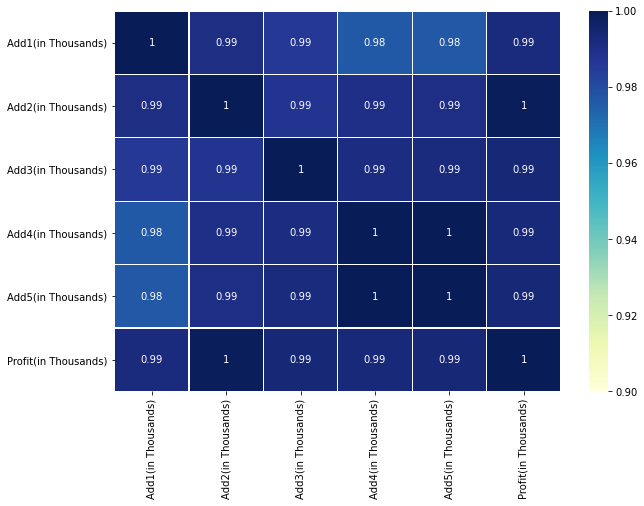

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, vmin=.9, vmax=1, annot=True, linewidth=.2, cmap='YlGnBu')
plt.show()

#### Since the value of the correlation coefficient is greater than 0.9 for each variable with profit, we can clearly say that there is a strong relationship between the amount spent for advertising through five different companies and profit generated.

#### Among the companies the second one has a perfect positive relationship with the profit generated. 

# 2. Building a regression model for prediction

In [22]:
# Splitting the data into dependent and independent variables
y=df[['Profit(in Thousands)']] # dependent variable
x=df.drop(['Profit(in Thousands)','Date'],axis=1) #independent variable

In [23]:
y.shape

(205, 1)

In [24]:
x.shape

(205, 5)

In [25]:
# Splitting the data into training and test data
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.2)

In [27]:
x_train.shape

(164, 5)

In [28]:
x_test.shape

(41, 5)

In [29]:
y_train.shape

(164, 1)

In [30]:
y_test.shape

(41, 1)

In [31]:
# Building the regression model
from sklearn import linear_model

In [34]:
lr = linear_model.LinearRegression()

In [35]:
# Creating the model using the training data
model = lr.fit(x_train, y_train)

In [36]:
# Predicting the result for test data
y_pred = lr.predict(x_test)

In [37]:
print(y_test)

     Profit(in Thousands)
15               4152.066
9                4446.441
100              5131.898
132              4907.560
68               5004.282
95               4623.793
159              5384.175
162              5328.025
147              5175.051
182              5956.323
191              5780.799
164              4997.719
65               5075.858
175              5784.540
73               4936.120
152              5065.652
18               4190.965
82               5034.726
86               5015.536
143              5134.657
60               5145.131
101              5421.940
98               4569.293
30               4598.292
25               4436.321
16               4175.677
168              5616.791
195              5667.250
97               4648.834
194              5717.838
67               5001.615
120              5182.368
154              5017.503
202              5545.013
79               5013.207
69               5030.451
145              5108.626
55          

In [38]:
print(y_pred)

[[4152.066]
 [4446.441]
 [5131.898]
 [4907.56 ]
 [5004.282]
 [4623.793]
 [5384.175]
 [5328.025]
 [5175.051]
 [5956.323]
 [5780.799]
 [4997.719]
 [5075.858]
 [5784.54 ]
 [4936.12 ]
 [5065.652]
 [4190.965]
 [5034.726]
 [5015.536]
 [5134.657]
 [5145.131]
 [5421.94 ]
 [4569.293]
 [4598.292]
 [4436.321]
 [4175.677]
 [5616.791]
 [5667.25 ]
 [4648.834]
 [5717.838]
 [5001.615]
 [5182.368]
 [5017.503]
 [5545.013]
 [5013.207]
 [5030.451]
 [5108.626]
 [4760.877]
 [4606.34 ]
 [4925.861]
 [5250.788]]


In [39]:
# Evaluating the model
from sklearn.metrics import mean_squared_error

In [40]:
mse = mean_squared_error(y_test, y_pred)

In [41]:
print('Mean Squared Error is:', mse)

Mean Squared Error is: 4.236778747222825e-25


In [42]:
# printing the constants of the model
model.coef_ # coefficients of the model

array([[ 1.  , 12.38,  3.5 ,  1.  ,  0.9 ]])

In [43]:
model.intercept_ # intercept of the model

array([-2.72848411e-12])

In [44]:
# R^2 of the fitted model
from sklearn.metrics import r2_score

In [45]:
R_square = r2_score(y_test, y_pred)

In [46]:
print('R square value is:', R_square)

R square value is: 1.0


#### Clearly by looking at the mean squared error and R square values of the fitted regression model, we get that the model is highly reliable.

# 3. Predicting the profit

In [47]:
# Creating a list of the sample values
l = [290, 312, 309, 298, 320]

In [48]:
pred_profit = lr.predict([l])

In [49]:
pred_profit

array([[5820.06]])

#### For the given sample values the profit will be 5820.06